In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
# Cargar el dataset
doc = "diabetes.csv"
data = pd.read_csv(doc)

In [3]:
# Mostrar las primeras filas del conjunto de datos para inspección inicial
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Verificar la existencia de valores faltantes en el conjunto de datos
missing_values = data.isnull().sum()
missing_values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Contar los valores de cero en columnas donde estos podrían indicar datos faltantes
potential_missing_zero_counts = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].eq(0).sum()
potential_missing_zero_counts

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [6]:
# Imputación de valores cero con la mediana de cada columna
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = data[column][data[column] != 0].median()
    data[column].replace(0, median_value, inplace=True)

# Mostrar los primeros datos para verificar la imputación
data.head()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_51504\3438395538.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(0, median_value, inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_51504\3438395538.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


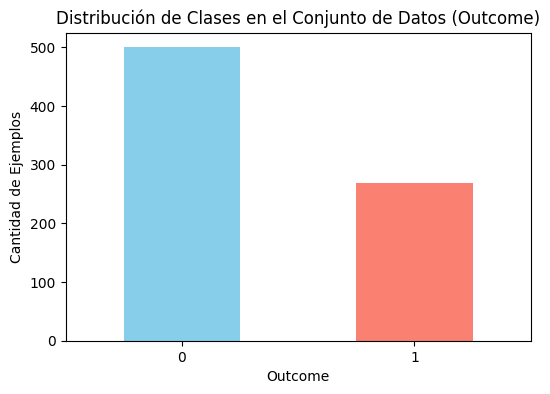

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

# Verificar el balance de clases en la columna 'Outcome'
class_counts = data['Outcome'].value_counts()

# Visualización de la distribución de clases
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clases en el Conjunto de Datos (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Cantidad de Ejemplos')
plt.xticks(rotation=0)
plt.show()

class_counts


In [8]:
# Aplicar ponderación de clases en el modelo de regresión logística
logreg_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Entrenar el modelo con ponderación de clases
logreg_weighted.fit(X_train, y_train)

# Predecir en el conjunto de validación
val_predictions_weighted = logreg_weighted.predict(X_val)

# Evaluar el rendimiento del modelo ponderado
val_accuracy_weighted = accuracy_score(y_val, val_predictions_weighted)
val_precision_weighted = precision_score(y_val, val_predictions_weighted)
val_recall_weighted = recall_score(y_val, val_predictions_weighted)
val_confusion_matrix_weighted = confusion_matrix(y_val, val_predictions_weighted)

val_accuracy_weighted, val_precision_weighted, val_recall_weighted, val_confusion_matrix_weighted


NameError: name 'X_train' is not defined

In [35]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar sobremuestreo de la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Entrenar el modelo de regresión logística en los datos sobremuestreados
logreg_oversampled = LogisticRegression(max_iter=1000, random_state=42)
logreg_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predecir en el conjunto de validación
val_predictions_oversampled = logreg_oversampled.predict(X_val)

# Evaluar el rendimiento del modelo sobremuestreado
val_accuracy_oversampled = accuracy_score(y_val, val_predictions_oversampled)
val_precision_oversampled = precision_score(y_val, val_predictions_oversampled)
val_recall_oversampled = recall_score(y_val, val_predictions_oversampled)
val_confusion_matrix_oversampled = confusion_matrix(y_val, val_predictions_oversampled)

val_accuracy_oversampled, val_precision_oversampled, val_recall_oversampled, val_confusion_matrix_oversampled


(0.7217391304347827,
 0.5869565217391305,
 0.675,
 array([[56, 19],
        [13, 27]], dtype=int64))

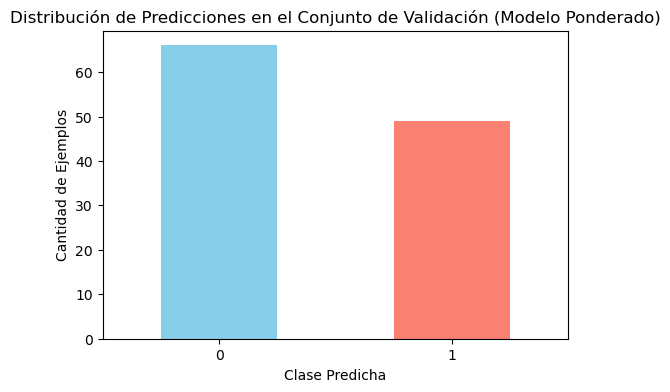

0    66
1    49
Name: count, dtype: int64

In [39]:
# Visualización de la distribución de clases después del ajuste de ponderación
# Distribución de las predicciones del modelo ponderado en el conjunto de validación

# Contar las predicciones de cada clase en el conjunto de validación
weighted_class_counts = pd.Series(val_predictions_weighted).value_counts()

# Graficar la distribución de predicciones del modelo ponderado
plt.figure(figsize=(6, 4))
weighted_class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Predicciones en el Conjunto de Validación (Modelo Ponderado)')
plt.xlabel('Clase Predicha')
plt.ylabel('Cantidad de Ejemplos')
plt.xticks(rotation=0)
plt.show()

weighted_class_counts


In [29]:
from sklearn.model_selection import train_test_split

# División del conjunto de datos
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Outcome'])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['Outcome'])

# Verificar las proporciones de cada conjunto
train_prop = len(train_data) / len(data)
val_prop = len(val_data) / len(data)
test_prop = len(test_data) / len(data)

train_prop, val_prop, test_prop


(0.69921875, 0.14973958333333334, 0.15104166666666666)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Separar características y etiquetas
X_train, y_train = train_data.drop(columns=['Outcome']), train_data['Outcome']
X_val, y_val = val_data.drop(columns=['Outcome']), val_data['Outcome']
X_test, y_test = test_data.drop(columns=['Outcome']), test_data['Outcome']

# Definir el modelo de regresión logística y los hiperparámetros para búsqueda en GridSearch
logreg = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_logreg = grid_search.best_estimator_
val_predictions = best_logreg.predict(X_val)

# Evaluar el rendimiento en el conjunto de validación
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_confusion_matrix = confusion_matrix(y_val, val_predictions)

val_accuracy, val_precision, val_recall, val_confusion_matrix


(0.7130434782608696,
 0.5945945945945946,
 0.55,
 array([[60, 15],
        [18, 22]], dtype=int64))

In [41]:
# Aplicar el modelo ponderado al conjunto de prueba
test_predictions_weighted = logreg_weighted.predict(X_test)

# Evaluar el rendimiento del modelo ponderado en el conjunto de prueba
test_accuracy_weighted = accuracy_score(y_test, test_predictions_weighted)
test_precision_weighted = precision_score(y_test, test_predictions_weighted)
test_recall_weighted = recall_score(y_test, test_predictions_weighted)
test_confusion_matrix_weighted = confusion_matrix(y_test, test_predictions_weighted)

test_accuracy_weighted, test_precision_weighted, test_recall_weighted, test_confusion_matrix_weighted


(0.7931034482758621,
 0.717948717948718,
 0.6829268292682927,
 array([[64, 11],
        [13, 28]], dtype=int64))

# Keras

In [ ]:
pip install tensorflow

In [51]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical

# Preparar los datos de entrada y salida para Keras
X_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
X_val_keras = np.array(X_val)
y_val_keras = np.array(y_val)
X_test_keras = np.array(X_test)
y_test_keras = np.array(y_test)

# Calcular la ponderación de clases
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_keras), y=y_train_keras)
class_weight_dict = dict(enumerate(class_weights))

# Definir el modelo de red neuronal en Keras
model = Sequential([
    Dense(16, input_shape=(X_train_keras.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])

# Entrenar el modelo con ponderación de clases
history = model.fit(X_train_keras, y_train_keras, 
                    epochs=100, 
                    batch_size=16, 
                    validation_data=(X_val_keras, y_val_keras), 
                    class_weight=class_weight_dict, 
                    verbose=0)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_keras, y_test_keras, verbose=0)
test_accuracy


C:\Users\dereck.marin\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.7844827771186829

In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import Callback

# Asegúrate de que X_train, y_train, X_val, y_val están definidos
# Preparar los datos de entrada y salida
X_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
X_val_keras = np.array(X_val)
y_val_keras = np.array(y_val)

# Calcular la ponderación de clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_keras), y=y_train_keras)
class_weight_dict = dict(enumerate(class_weights))

# Definir el modelo de red neuronal en Keras
model = Sequential([
    Dense(16, input_shape=(X_train_keras.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])

# Definir una función de callback para mostrar la pérdida y la precisión en cada época
class PrintEpochStats(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, "
              f"Val_Loss = {logs['val_loss']:.4f}, Val_Accuracy = {logs['val_accuracy']:.4f}")

# Entrenar el modelo con ponderación de clases y mostrar el progreso en cada época
history = model.fit(X_train_keras, y_train_keras, 
                    epochs=240, 
                    batch_size=16, 
                    validation_data=(X_val_keras, y_val_keras), 
                    class_weight=class_weight_dict, 
                    callbacks=[PrintEpochStats()])


Epoch 1/240


C:\Users\dereck.marin\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3869 - loss: 9.0873Epoch 1: Loss = 5.5827, Accuracy = 0.4451, Val_Loss = 4.0778, Val_Accuracy = 0.5043
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4058 - loss: 8.1232 - val_accuracy: 0.5043 - val_loss: 4.0778
Epoch 2/240
28/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 1.3358Epoch 2: Loss = 1.1154, Accuracy = 0.6238, Val_Loss = 1.8522, Val_Accuracy = 0.5565
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 1.2978 - val_accuracy: 0.5565 - val_loss: 1.8522
Epoch 3/240
26/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.9471Epoch 3: Loss = 0.8109, Accuracy = 0.6667, Val_Loss = 1.2754, Val_Accuracy = 0.5826
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6708 - loss: 0.9176 - val_accuracy: 0.5826 - val_loss: 1.2754
Epoch 4/240
25/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6033 - loss: 0.9855Epoch 4: Loss = 0.7387, Accuracy = 0.6592, Val_Loss = 0.9764, Val_Accuracy = 0

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Preparar los datos de entrada y salida para Keras
X_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
X_val_keras = np.array(X_val)
y_val_keras = np.array(y_val)
X_test_keras = np.array(X_test)
y_test_keras = np.array(y_test)

# Calcular la ponderación de clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_keras), y=y_train_keras)
class_weight_dict = dict(enumerate(class_weights))

# Definir una función para crear y compilar el modelo
def create_model(layers=[16, 8], dropout_rate=0.2, learning_rate=0.001, optimizer_type='Adam'):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(X_train_keras.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))  # Aplicar dropout a la primera capa oculta
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))  # Aplicar dropout a cada capa oculta adicional
    model.add(Dense(1, activation='sigmoid'))
    
    # Elegir el optimizador
    if optimizer_type == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)
    
    # Compilar el modelo
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Escenarios para probar
scenarios = [
    {'layers': [32, 16, 8], 'dropout_rate': 0.3, 'learning_rate': 0.001, 'optimizer_type': 'Adam'},
    {'layers': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'optimizer_type': 'RMSprop'},
    {'layers': [16, 8], 'dropout_rate': 0.1, 'learning_rate': 0.001, 'optimizer_type': 'Adam'},
    {'layers': [32, 16, 8], 'dropout_rate': 0.4, 'learning_rate': 0.001, 'optimizer_type': 'RMSprop'}
]

# Variable para almacenar resultados
results = []

# Configurar parada temprana
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrenar y evaluar modelos para cada escenario
for scenario in scenarios:
    model = create_model(**scenario)
    history = model.fit(
        X_train_keras, y_train_keras,
        epochs=100,
        batch_size=16,
        validation_data=(X_val_keras, y_val_keras),
        class_weight=class_weight_dict,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluar en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_keras, y_test_keras, verbose=0)
    results.append({
        'scenario': scenario,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss
    })

# Mostrar los resultados de cada escenario
for result in results:
    print(f"Scenario: {result['scenario']}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Test Loss: {result['test_loss']:.4f}\n")


C:\Users\dereck.marin\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Scenario: {'layers': [32, 16, 8], 'dropout_rate': 0.3, 'learning_rate': 0.001, 'optimizer_type': 'Adam'}
Test Accuracy: 0.3534
Test Loss: 0.7605

Scenario: {'layers': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'optimizer_type': 'RMSprop'}
Test Accuracy: 0.6897
Test Loss: 0.7835

Scenario: {'layers': [16, 8], 'dropout_rate': 0.1, 'learning_rate': 0.001, 'optimizer_type': 'Adam'}
Test Accuracy: 0.3793
Test Loss: 1.3083

Scenario: {'layers': [32, 16, 8], 'dropout_rate': 0.4, 'learning_rate': 0.001, 'optimizer_type': 'RMSprop'}
Test Accuracy: 0.6638
Test Loss: 0.6681



In [87]:
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam, Adam

def create_model(layers=[16, 8], dropout_rate=0.2, l2_reg=0.001, learning_rate=0.001, optimizer_type='Adam'):
    model = Sequential()
    model.add(Input(shape=(X_train_keras.shape[1],)))  # Definir la forma de entrada correctamente
    model.add(Dense(layers[0], activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    
    for units in layers[1:]:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Configuración del optimizador
    if optimizer_type == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'Nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # Usar Adam como predeterminado
    
    # Compilar el modelo
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Configuración de los callbacks avanzados
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entrenamiento y evaluación
results = []
for scenario in scenarios:
    model = create_model(**scenario)
    history = model.fit(
        X_train_keras, y_train_keras,
        epochs=200,
        batch_size=32,
        validation_data=(X_val_keras, y_val_keras),
        class_weight=class_weight_dict,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Evaluación en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test_keras, y_test_keras, verbose=0)
    results.append({
        'scenario': scenario,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss
    })

# Mostrar resultados
for result in results:
    print(f"Scenario: {result['scenario']}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Test Loss: {result['test_loss']:.4f}\n")


Scenario: {'layers': [32, 16, 8], 'dropout_rate': 0.3, 'learning_rate': 0.001, 'optimizer_type': 'Adam'}
Test Accuracy: 0.7500
Test Loss: 0.6225

Scenario: {'layers': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'optimizer_type': 'RMSprop'}
Test Accuracy: 0.4138
Test Loss: 1.3817

Scenario: {'layers': [16, 8], 'dropout_rate': 0.1, 'learning_rate': 0.001, 'optimizer_type': 'Adam'}
Test Accuracy: 0.3534
Test Loss: 2.0695

Scenario: {'layers': [32, 16, 8], 'dropout_rate': 0.4, 'learning_rate': 0.001, 'optimizer_type': 'RMSprop'}
Test Accuracy: 0.3190
Test Loss: 0.8647



# Regresion Logistica

Test Accuracy: 0.7931
Confusion Matrix:
[[64 11]
 [13 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        75
           1       0.72      0.68      0.70        41

    accuracy                           0.79       116
   macro avg       0.77      0.77      0.77       116
weighted avg       0.79      0.79      0.79       116

AUC Score: 0.8598


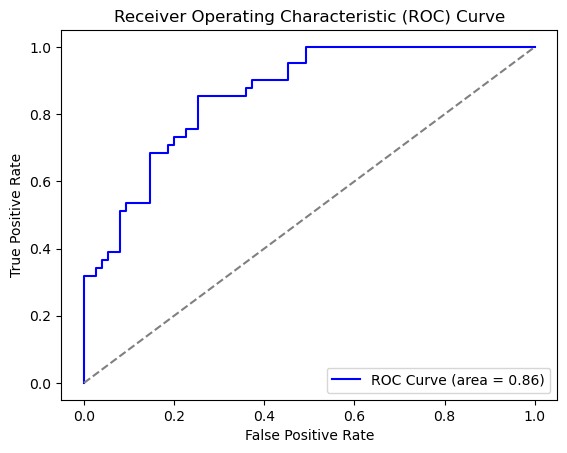

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Entrenamiento del modelo de regresión logística
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_keras, y_train_keras)

# Predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test_keras)
y_pred_proba = log_reg.predict_proba(X_test_keras)[:, 1]  # Probabilidades para calcular AUC

# Evaluación de precisión
test_accuracy = accuracy_score(y_test_keras, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test_keras, y_pred)
class_report = classification_report(y_test_keras, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Curva ROC y AUC
roc_auc = roc_auc_score(y_test_keras, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test_keras, y_pred_proba)
print(f"AUC Score: {roc_auc:.4f}")

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [92]:
import joblib
from sklearn.linear_model import LogisticRegression

# 1. Entrenar el modelo (usa tus datos de entrenamiento)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_keras, y_train_keras)

# 2. Guardar el modelo entrenado en un archivo
model_filename = 'logistic_regression_model.pkl'
joblib.dump(log_reg, model_filename)
print(f"Modelo guardado como '{model_filename}'")


Modelo guardado como 'logistic_regression_model.pkl'


In [98]:
import numpy as np
import joblib

# Función para cargar el modelo y realizar una predicción descriptiva
def predict_with_logistic_regression(input_data):
    """
    Predice si una persona tiene diabetes usando el modelo de regresión logística guardado.
    
    Parámetros:
        input_data (list o array): Una lista o array de longitud 8 con los valores de las características de entrada.
    
    Retorno:
        resultado (str): "Tiene diabetes" o "No tiene diabetes" basado en la predicción del modelo.
    """
    # Verificar que input_data tenga la longitud correcta
    if len(input_data) != 8:
        raise ValueError("La entrada debe ser una lista o array de 8 elementos.")
    
    # Cargar el modelo guardado
    log_reg = joblib.load('logistic_regression_model.pkl')
    
    # Convertir la entrada a un array de numpy y remodelar para predecir
    input_array = np.array(input_data).reshape(1, -1)
    prediction = log_reg.predict(input_array)
    
    # Interpretar el resultado de la predicción
    if prediction[0] == 1:
        return "Tiene diabetes"
    else:
        return "No tiene diabetes"


In [100]:
# Ejemplo de parámetros de entrada (reemplaza estos valores con los reales)
input_data = [0.5, -1.2, 0.3, 1.0, -0.5, 1.2, -0.7, 0.9]

# Llamar a la función para obtener una predicción
resultado = predict_with_logistic_regression(input_data)
print(f"Resultado: {resultado}")



Resultado: No tiene diabetes


In [102]:
# Lista de datos de prueba
test_data = [
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
    [1, 89, 66, 23, 94, 28.1, 0.167, 21],
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],
    [10, 115, 0, 0, 0, 35.3, 0.134, 29],
    [4, 110, 92, 0, 0, 37.6, 0.191, 30]
]

# Probar cada entrada y mostrar el resultado
for i, data in enumerate(test_data, start=1):
    resultado = predict_with_logistic_regression(data)
    print(f"Resultado para el conjunto de datos {i}: {resultado}")


Resultado para el conjunto de datos 1: No tiene diabetes
Resultado para el conjunto de datos 2: No tiene diabetes
Resultado para el conjunto de datos 3: No tiene diabetes
Resultado para el conjunto de datos 4: Tiene diabetes
Resultado para el conjunto de datos 5: Tiene diabetes


In [106]:
# Nuevos datos de prueba con casos positivos esperados
test_data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33],
    [3, 78, 50, 32, 88, 31, 0.248, 26],
    [2, 197, 70, 45, 543, 30.5, 0.158, 53],
    [8, 125, 96, 0, 0, 0, 0.232, 54],
    [10, 168, 74, 0, 0, 38, 0.537, 34],
    [1, 189, 60, 23, 846, 30.1, 0.398, 59],
    [5, 166, 72, 19, 175, 25.8, 0.587, 51],
    [7, 100, 0, 0, 0, 30, 0.484, 32]
]

# Probar cada entrada con un umbral ajustado y mostrar el resultado
for i, data in enumerate(test_data, start=1):
    resultado = predict_with_logistic_regression(data)  # Se usa threshold=0.4 para aumentar sensibilidad
    print(f"Resultado para el conjunto de datos {i}: {resultado}")


Resultado para el conjunto de datos 1: Tiene diabetes
Resultado para el conjunto de datos 2: Tiene diabetes
Resultado para el conjunto de datos 3: Tiene diabetes
Resultado para el conjunto de datos 4: No tiene diabetes
Resultado para el conjunto de datos 5: Tiene diabetes
Resultado para el conjunto de datos 6: No tiene diabetes
Resultado para el conjunto de datos 7: Tiene diabetes
Resultado para el conjunto de datos 8: Tiene diabetes
Resultado para el conjunto de datos 9: Tiene diabetes
Resultado para el conjunto de datos 10: No tiene diabetes


In [108]:
import numpy as np
import joblib

# Función para cargar el modelo y realizar una predicción descriptiva con ajuste de umbral
def predict_with_logistic_regression(input_data, threshold=0.5):
    """
    Predice si una persona tiene diabetes usando el modelo de regresión logística guardado.
    
    Parámetros:
        input_data (list o array): Una lista o array de longitud 8 con los valores de las características de entrada.
        threshold (float): Umbral para clasificar como "Tiene diabetes". Por defecto es 0.5.
    
    Retorno:
        resultado (str): "Tiene diabetes" o "No tiene diabetes" basado en la predicción del modelo.
    """
    # Verificar que input_data tenga la longitud correcta
    if len(input_data) != 8:
        raise ValueError("La entrada debe ser una lista o array de 8 elementos.")
    
    # Cargar el modelo guardado
    log_reg = joblib.load('logistic_regression_model.pkl')
    
    # Convertir la entrada a un array de numpy y remodelar para predecir la probabilidad
    input_array = np.array(input_data).reshape(1, -1)
    probability = log_reg.predict_proba(input_array)[0, 1]  # Probabilidad de la clase "Tiene diabetes"
    
    # Clasificar en base al umbral ajustado
    if probability >= threshold:
        return "Tiene diabetes"
    else:
        return "No tiene diabetes"


In [110]:
# Nuevos datos de prueba con casos positivos esperados
test_data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33],
    [3, 78, 50, 32, 88, 31, 0.248, 26],
    [2, 197, 70, 45, 543, 30.5, 0.158, 53],
    [8, 125, 96, 0, 0, 0, 0.232, 54],
    [10, 168, 74, 0, 0, 38, 0.537, 34],
    [1, 189, 60, 23, 846, 30.1, 0.398, 59],
    [5, 166, 72, 19, 175, 25.8, 0.587, 51],
    [7, 100, 0, 0, 0, 30, 0.484, 32]
]

# Probar cada entrada con un umbral ajustado y mostrar el resultado
for i, data in enumerate(test_data, start=1):
    resultado = predict_with_logistic_regression(data)  # Se usa threshold=0.4 para aumentar sensibilidad
    print(f"Resultado para el conjunto de datos {i}: {resultado}")


Resultado para el conjunto de datos 1: Tiene diabetes
Resultado para el conjunto de datos 2: Tiene diabetes
Resultado para el conjunto de datos 3: Tiene diabetes
Resultado para el conjunto de datos 4: No tiene diabetes
Resultado para el conjunto de datos 5: Tiene diabetes
Resultado para el conjunto de datos 6: No tiene diabetes
Resultado para el conjunto de datos 7: Tiene diabetes
Resultado para el conjunto de datos 8: Tiene diabetes
Resultado para el conjunto de datos 9: Tiene diabetes
Resultado para el conjunto de datos 10: No tiene diabetes


In [112]:
# Lista de datos de prueba
test_data = [
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
    [1, 89, 66, 23, 94, 28.1, 0.167, 21],
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],
    [10, 115, 0, 0, 0, 35.3, 0.134, 29],
    [4, 110, 92, 0, 0, 37.6, 0.191, 30]
]

# Probar cada entrada y mostrar el resultado
for i, data in enumerate(test_data, start=1):
    resultado = predict_with_logistic_regression(data)
    print(f"Resultado para el conjunto de datos {i}: {resultado}")


Resultado para el conjunto de datos 1: No tiene diabetes
Resultado para el conjunto de datos 2: No tiene diabetes
Resultado para el conjunto de datos 3: No tiene diabetes
Resultado para el conjunto de datos 4: Tiene diabetes
Resultado para el conjunto de datos 5: Tiene diabetes


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib

# Cargar los datos de entrenamiento desde el archivo local
training_data = pd.read_csv("diabetes.csv", encoding='utf-8')

# Seleccionar las columnas de características (excluyendo el objetivo 'Outcome')
features = training_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Crear y ajustar el imputador y escalador
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Ajustar el imputador y luego el escalador
imputed_data = imputer.fit_transform(features)  # Ajustar y transformar con el imputador
scaler.fit(imputed_data)  # Ajustar el escalador usando los datos imputados

# Guardar los preprocesadores ajustados en archivos
joblib.dump(imputer, "imputer.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']